# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

In [3]:
from google.colab import drive
#drive.mount('/content/data', force_remount=True)
#data = pd.read_csv('data/My Drive/ColabData/bank-additional-full.csv', sep = ';')
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

Mounted at /content/data


In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [8]:
# Get categorical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Get numerical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [9]:
# Get the number of unique values in the categorical features
for feature in categorical_features:
    print(f"Number of Unique Values in {feature}: {data[feature].nunique()}")

Number of Unique Values in job: 12
Number of Unique Values in marital: 4
Number of Unique Values in education: 8
Number of Unique Values in default: 3
Number of Unique Values in housing: 3
Number of Unique Values in loan: 3
Number of Unique Values in contact: 2
Number of Unique Values in month: 10
Number of Unique Values in day_of_week: 5
Number of Unique Values in poutcome: 3
Number of Unique Values in y: 2


In [10]:
# Get the unique values of the categorical features
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique Values in marital: ['married' 'single' 'divorced' 'unknown']

Unique Values in education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique Values in default: ['no' 'unknown' 'yes']

Unique Values in housing: ['no' 'yes' 'unknown']

Unique Values in loan: ['no' 'yes' 'unknown']

Unique Values in contact: ['telephone' 'cellular']

Unique Values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Unique Values in day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

Unique Values in poutcome: ['nonexistent' 'failure' 'success']

Unique Values in y: ['no' 'yes']



In [11]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# Replace 'Admin.' with 'Admin' in the 'Job' column
data['job'] = data['job'].replace({'admin.': 'admin'})

# Replace 'may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep' with full month names in the 'Month' column
data['month'] = data['month'].replace({'may': 'May', 'jun': 'June', 'jul': 'July', 'aug': 'August', 'oct': 'October', 'nov': 'November', 'dec': 'December', 'mar': 'March', 'apr': 'April', 'sep': 'September'})

# Replace 'Mon' 'Tue' 'Wed' 'Thu' 'Fri' with full day names in the 'DayOfWeek' column
data['day_of_week'] = data['day_of_week'].replace({'mon': 'Monday', 'tue': 'Tuesday', 'wed': 'Wednesday', 'thu': 'Thursday', 'fri': 'Friday'})

# Verify
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in job: ['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique Values in marital: ['married' 'single' 'divorced' 'unknown']

Unique Values in education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique Values in default: ['no' 'unknown' 'yes']

Unique Values in housing: ['no' 'yes' 'unknown']

Unique Values in loan: ['no' 'yes' 'unknown']

Unique Values in contact: ['telephone' 'cellular']

Unique Values in month: ['May' 'June' 'July' 'August' 'October' 'November' 'December' 'March'
 'April' 'September']

Unique Values in day_of_week: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']

Unique Values in poutcome: ['nonexistent' 'failure' 'success']

Unique Values in y: ['no' 'yes']



In [13]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic.6y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# Replace '.' with ' ' in all columns
for feature in categorical_features:
     if data[feature].dtype == 'object':
        data[feature] = data[feature].str.replace('.', ' ')

# Verify
for feature in categorical_features:
    print(f"Unique Values in {feature}: {data[feature].unique()}")
    print("")

Unique Values in job: ['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique Values in marital: ['married' 'single' 'divorced' 'unknown']

Unique Values in education: ['basic 4y' 'high school' 'basic 6y' 'basic 9y' 'professional course'
 'unknown' 'university degree' 'illiterate']

Unique Values in default: ['no' 'unknown' 'yes']

Unique Values in housing: ['no' 'yes' 'unknown']

Unique Values in loan: ['no' 'yes' 'unknown']

Unique Values in contact: ['telephone' 'cellular']

Unique Values in month: ['May' 'June' 'July' 'August' 'October' 'November' 'December' 'March'
 'April' 'September']

Unique Values in day_of_week: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']

Unique Values in poutcome: ['nonexistent' 'failure' 'success']

Unique Values in y: ['no' 'yes']



In [15]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic 4y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic 6y,no,no,no,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,May,Monday,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 4: Data Quality and Clean Up

In [16]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


No missing values, no need to handle missing values

In [17]:
# Number of rows in the dataset
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 41188


In [18]:
# Number of duplicate rows in the dataset
print("Number of Duplicate Rows in the Dataset:", data.duplicated().sum())

Number of Duplicate Rows in the Dataset: 12


In [19]:
# only 12 duplicated rows, we'll just drop them.
data = data.drop_duplicates()

# Verify
print("Number of Rows in the Dataset:", data.shape[0])

Number of Rows in the Dataset: 41176


In [20]:
# Examining the balance of the target variable ('y')
data['y'].value_counts()

,count
y,
no,36537
yes,4639


In [21]:
# Convert to percentages
data['y'].value_counts(normalize=True) * 100

,proportion
y,
no,88.733728
yes,11.266272


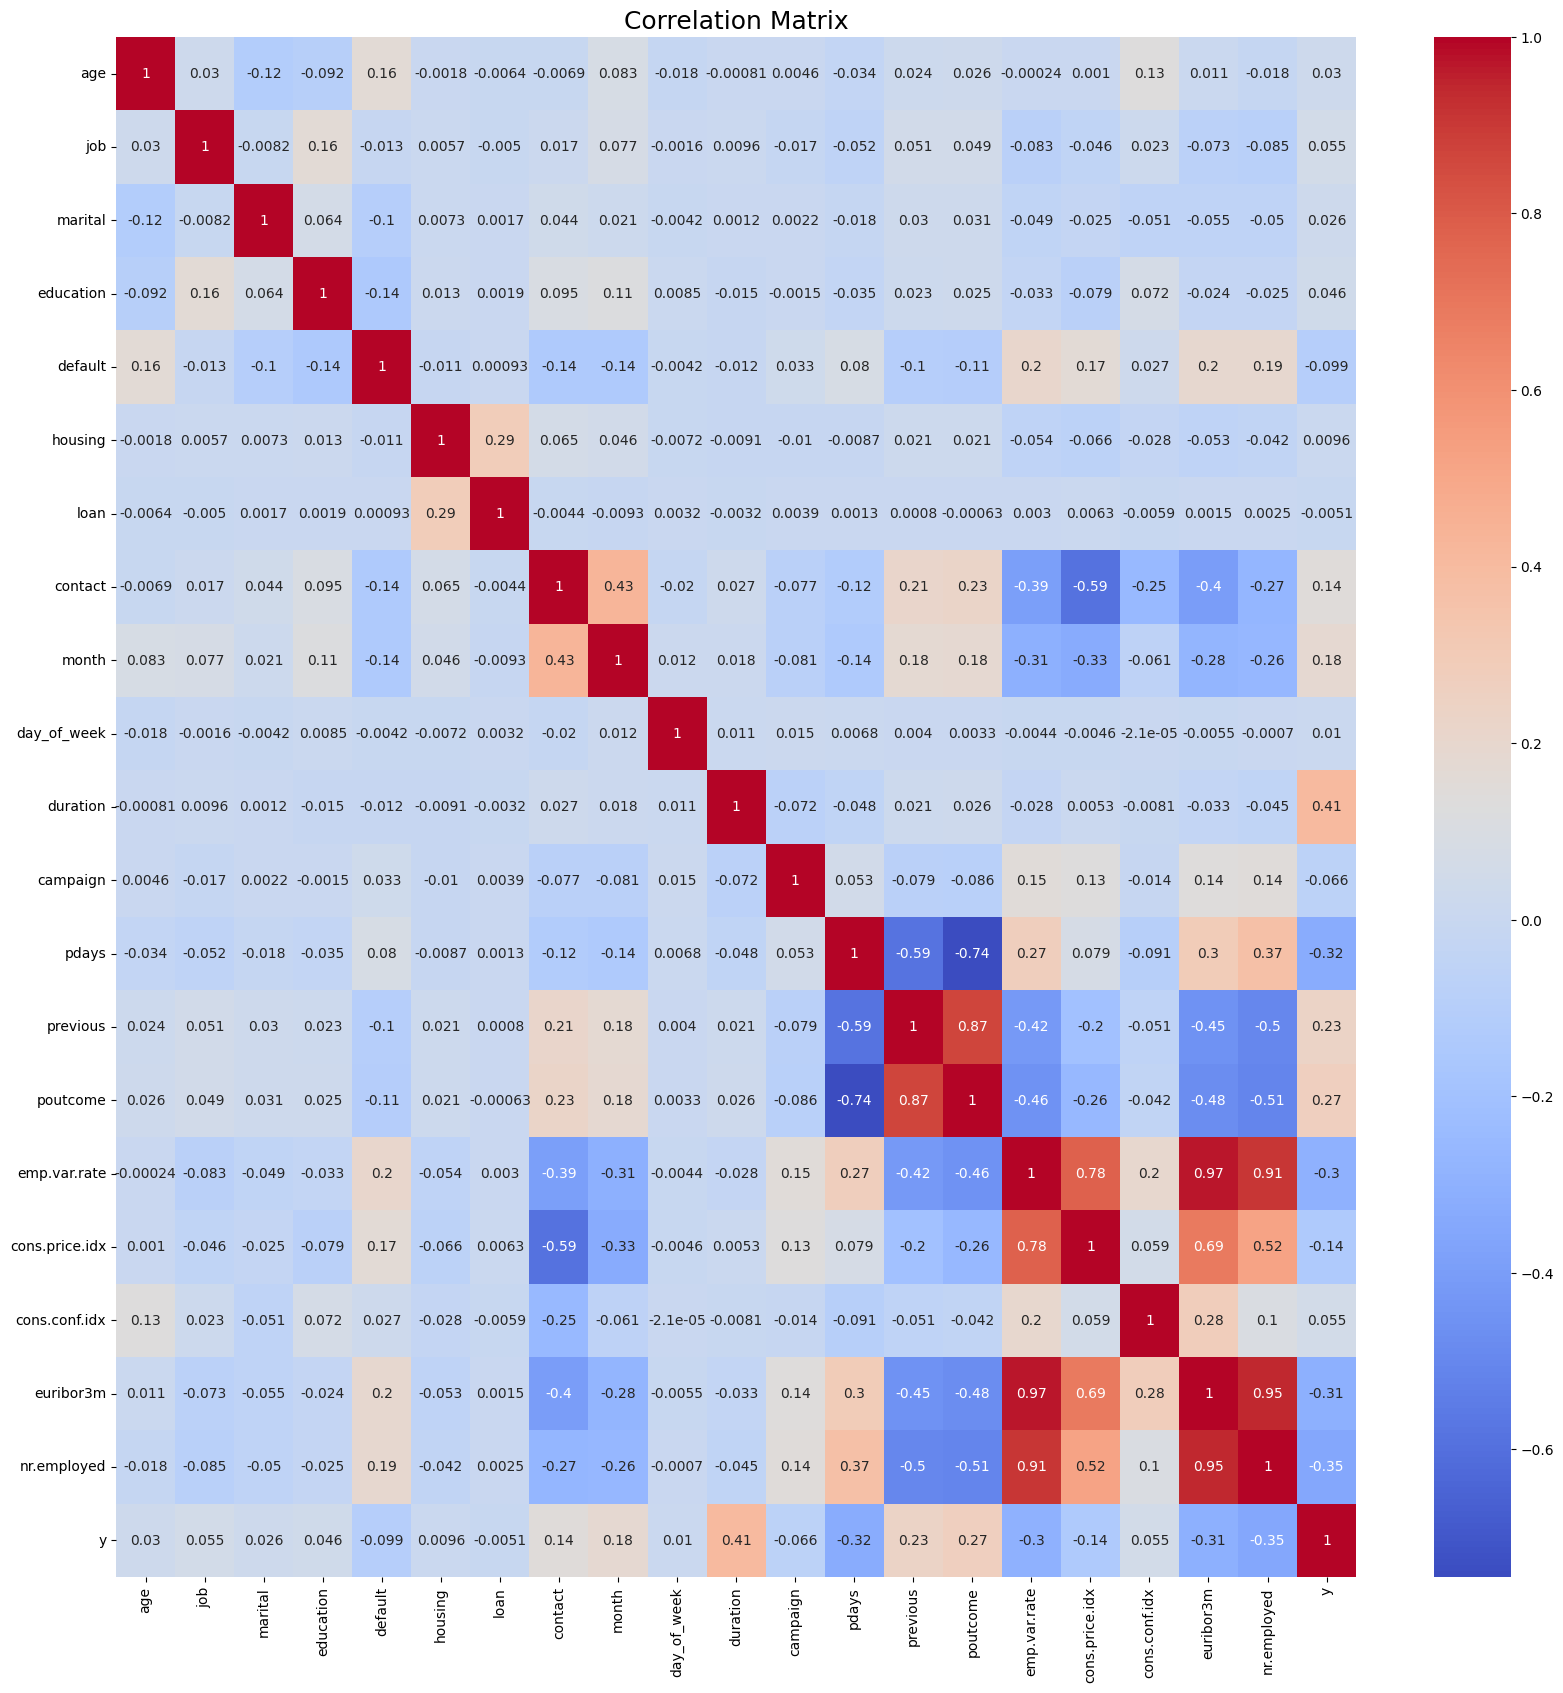

In [22]:
# Correlation matrix
# Convert categorical string values to numeric values before computing correlation
data_numeric = data.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)
plt.figure(figsize=(20, 20))
sns.heatmap(data=data_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix", fontsize=18)
plt.show()

### Problem 5: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business objective for this practice is to predict whether a client will subscribe to a term deposit using the features in the dataset. To make this prediction, various classification models will be trained and evaluated to determine the best performing model for this task.

### Problem 6: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [23]:
# Identify and count 'Unknown' values in each categorical feature
unknown_counts = {feature: data[feature][data[feature] == 'unknown'].count() for feature in categorical_features if 'unknown' in data[feature].unique()}
unknown_counts

{'job': np.int64(330),
 'marital': np.int64(80),
 'education': np.int64(1730),
 'default': np.int64(8596),
 'housing': np.int64(990),
 'loan': np.int64(990)}

In [24]:
# Get value counts for the 'Default' column
data['default'].value_counts()

,count
default,
no,32577
unknown,8596
yes,3


In [25]:
# Since there are only 3 'yes' values in the 'Default' column, we'll just drop these rows
data = data.drop(data[data['default'] == 'yes'].index)

# Verify
data['default'].value_counts()

,count
default,
no,32577
unknown,8596


In [26]:
# Define Function to prepare data and impute unknowns for a given feature
def impute_unknowns(feature, predictors):
    # Filter rows where the feature is known and unknown
    known = data[data[feature] != 'unknown']
    unknown = data[data[feature] == 'unknown']

    # Prepare the training data (features without the target feature and rows with known values)
    X_train = known[predictors]
    y_train = known[feature]

    # Prepare the data where the feature needs to be predicted
    X_unknown = unknown[predictors]

    # Encode categorical data
    X_train_encoded = pd.get_dummies(X_train, drop_first=True)
    X_unknown_encoded = pd.get_dummies(X_unknown, drop_first=True)

    # Ensure the same columns in both datasets (in case of missing columns)
    X_train_encoded, X_unknown_encoded = X_train_encoded.align(X_unknown_encoded, join='left', axis=1, fill_value=0)

    # Train the Decision Tree model
    model = DecisionTreeClassifier(random_state=0)
    model.fit(X_train_encoded, y_train)

    # Predict the 'Unknown' values
    y_unknown_pred = model.predict(X_unknown_encoded)

    # Impute the predicted values back into the original dataframe
    data.loc[data[feature] == 'unknown', feature] = y_unknown_pred

In [27]:
# Display the categorical and numerical features
print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Numerical Features: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [28]:
# List of predictors - using other categorical features and some numerical features
predictors = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'age']

In [29]:
# Impute 'Unknown' for 'Job' feature
impute_unknowns('job', predictors)

# Impute 'Unknown' for 'Marital' feature
impute_unknowns('marital', predictors)

# Impute 'Unknown' for 'Education' feature
impute_unknowns('education', predictors)

# Impute 'Unknown' for 'Housing' feature
impute_unknowns('housing', predictors)

# Impute 'Unknown' for 'Loan' feature
impute_unknowns('loan', predictors)

# Verify
unknown_counts = {feature: data[feature][data[feature] == 'unknown'].count() for feature in categorical_features if 'unknown' in data[feature].unique()}
pd.DataFrame(unknown_counts, index=['Count']).T

,Count
default,8596


In [30]:
pd.set_option('future.no_silent_downcasting', True)

In [31]:
# Binary encode 'default', 'housing', 'loan' and 'subscribed' features
data['default'] = data['default'].replace({'no': 0, 'unknown': 1, 'yes': 1}).astype(int) # Include 'yes':1 for this column too
data['housing'] = data['housing'].replace({'no': 0, 'yes': 1, 'unknown': 0}).astype(int) # Change 'unknown' to 0 or 1
data['loan'] = data['loan'].replace({'no': 0, 'yes': 1, 'unknown': 0}).astype(int)  # Change 'unknown' to 0 or 1
data['y'] = data['y'].replace({'no': 0, 'yes': 1}).astype(int)

# Verify
data[['housing', 'loan', 'y']].head()

,housing,loan,y
0,0,0,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,1,0


In [32]:
# Label encoders for 'education', 'month', and 'day_of_week'
label_encoder_education = LabelEncoder()
label_encoder_month = LabelEncoder()
label_encoder_dayofweek = LabelEncoder()

# Define the ordering for Education, including 'unknown'
education_order = ['unknown', 'illiterate', 'basic 4y', 'basic 6y', 'basic 9y', 'high school', 'professional course', 'university degree']
# Fit the encoder based on the defined order, including 'unknown'
label_encoder_education.fit(education_order)

# Define the ordering for Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Fit the encoder based on the defined order
label_encoder_month.fit(month_order)

# Define the ordering for DayOfWeek
dayofweek_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Fit the encoder based on the defined order
label_encoder_dayofweek.fit(dayofweek_order)


# Apply label encoding to the 'Education', 'Month', and 'DayOfWeek' features
data['education'] = label_encoder_education.transform(data['education'])
data['month'] = label_encoder_month.transform(data['month'])
data['day_of_week'] = label_encoder_dayofweek.transform(data['day_of_week'])

# Verify
data[['education', 'month', 'day_of_week']].head()

,education,month,day_of_week
0,0,8,1
1,3,8,1
2,3,8,1
3,1,8,1
4,3,8,1


In [33]:
# Select categorical features for one-hot encoding
categorical_to_encode = [col for col in categorical_features if col not in ['default', 'housing', 'loan', 'y', 'education', 'month', 'day_of_week']]

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_to_encode, drop_first=True)

# Verify
data_encoded.head()

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,8,1,261,1,999,...,False,False,False,False,False,True,False,True,True,False
1,57,3,1,0,0,8,1,149,1,999,...,False,True,False,False,False,True,False,True,True,False
2,37,3,0,1,0,8,1,226,1,999,...,False,True,False,False,False,True,False,True,True,False
3,40,1,0,0,0,8,1,151,1,999,...,False,False,False,False,False,True,False,True,True,False
4,56,3,0,0,1,8,1,307,1,999,...,False,True,False,False,False,True,False,True,True,False


In [34]:
# Move 'y' to the end
cols = data_encoded.columns.tolist()
cols.append(cols.pop(cols.index('y')))
data_encoded = data_encoded[cols]

# Verify
data_encoded.head()

,age,education,default,housing,loan,month,day_of_week,duration,campaign,pdays,...,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_nonexistent,poutcome_success,y
0,56,0,0,0,0,8,1,261,1,999,...,False,False,False,False,True,False,True,True,False,0
1,57,3,1,0,0,8,1,149,1,999,...,True,False,False,False,True,False,True,True,False,0
2,37,3,0,1,0,8,1,226,1,999,...,True,False,False,False,True,False,True,True,False,0
3,40,1,0,0,0,8,1,151,1,999,...,False,False,False,False,True,False,True,True,False,0
4,56,3,0,0,1,8,1,307,1,999,...,True,False,False,False,True,False,True,True,False,0


### Problem 7: Train/Test Split

With your data prepared, split it into a train and test set.

In [35]:
# Split the data into train and test sets
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Scale numerical features
scaler = StandardScaler()
features_to_scale = numerical_features
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [37]:
print(f'X_train Shape: {X_train.shape}')
print(f'y_train Shape: {y_train.shape}')
print(f'X_test Shape: {X_test.shape}')
print(f'y_test Shape: {y_test.shape}')

X_train Shape: (32938, 31)
y_train Shape: (32938,)
X_test Shape: (8235, 31)
y_test Shape: (8235,)


### Problem 8: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [38]:
# A baseline model would simply predict the most frequent class

# Calculate the frequency of each class in the 'y' column
subscription_counts = data['y'].value_counts(normalize=True)

# The baseline accuracy is the proportion of the majority class
baseline_accuracy = subscription_counts.max()

baseline_accuracy, subscription_counts

(0.8873290748791683,
 y
 0    0.887329
 1    0.112671
 Name: proportion, dtype: float64)

### Problem 9: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [39]:
# Initialize an empty dataframe to store results
model_results = pd.DataFrame(columns=['Model Name', 'Training Time (Seconds)', 'Training Accuracy (%)', 'Test Accuracy (%)'])

In [40]:
# Build logistic regression model
logistic_regression_model = LogisticRegression(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
logistic_regression_model.fit(X_train, y_train)

# Calculate training time
logistic_regression_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = logistic_regression_model.predict(X_train)

# Calculate the training accuracy of the model
logistic_regression_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = logistic_regression_model.predict(X_test)

# Calculate the test accuracy of the model
logistic_regression_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Initialize an empty list to store results
model_results_list = []

# Store the results in model_results_list
logistic_regression_results_row = {
    'Model Name': 'Logistic Regression',
    'Training Time (Seconds)': round(logistic_regression_training_time, 4),
    'Training Accuracy (%)': round(logistic_regression_training_accuracy, 4),
    'Test Accuracy (%)': round(logistic_regression_test_accuracy, 4)
}
model_results_list.append(logistic_regression_results_row)

# Create DataFrame after appending all results
model_results = pd.DataFrame(model_results_list)

print(model_results.tail(1))

            Model Name  Training Time (Seconds)  Training Accuracy (%)  \
0  Logistic Regression                   0.6393                91.0256   

   Test Accuracy (%)  
0            91.1233  


### Problem 10: Score the Model

What is the accuracy of your model?

Training Time: 0.3377 seconds

Traning Accuracy: 91.0256%

Test Accuracy: 91.1233%

### Problem 11: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### KNN Model

In [41]:
# Build KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Start timing the training process
start_time = time.time()

# Fit the model
knn_model.fit(X_train, y_train)

# Calculate training time
knn_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = knn_model.predict(X_train)

# Calculate the training accuracy of the model
knn_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = knn_model.predict(X_test)

# Calculate the test accuracy of the model
knn_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
knn_results_row = {
    'Model Name': 'KNN',
    'Training Time (Seconds)': round(knn_training_time, 4),
    'Training Accuracy (%)': round(knn_training_accuracy, 4),
    'Test Accuracy (%)': round(knn_test_accuracy, 4)
}

model_results_list.append(knn_results_row)

# Create DataFrame after appending all results
model_results = pd.DataFrame(model_results_list)

print(model_results.tail(1))


  Model Name  Training Time (Seconds)  Training Accuracy (%)  \
1        KNN                   0.0197                92.9079   

   Test Accuracy (%)  
1            89.8968  


#### Decision Tree Model

In [42]:
# Build Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
decision_tree_model.fit(X_train, y_train)

# Calculate training time
decision_tree_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = decision_tree_model.predict(X_train)

# Calculate the training accuracy of the model
decision_tree_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = decision_tree_model.predict(X_test)

# Calculate the test accuracy of the model
decision_tree_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
decision_tree_results_row = {
    'Model Name': 'Decision Tree',
    'Training Time (Seconds)': round(decision_tree_training_time, 4),
    'Training Accuracy (%)': round(decision_tree_training_accuracy, 4),
    'Test Accuracy (%)': round(decision_tree_test_accuracy, 4)
}

model_results_list.append(decision_tree_results_row)

# Create DataFrame after appending all results
model_results = pd.DataFrame(model_results_list)

print(model_results.tail(1))

      Model Name  Training Time (Seconds)  Training Accuracy (%)  \
2  Decision Tree                   0.2531                  100.0   

   Test Accuracy (%)  
2             88.816  


#### Random Forest Model

In [43]:
# Build Random Forest model
random_forest_model = RandomForestClassifier(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
random_forest_model.fit(X_train, y_train)

# Calculate training time
random_forest_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = random_forest_model.predict(X_train)

# Calculate the training accuracy of the model
random_forest_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = random_forest_model.predict(X_test)

# Calculate the test accuracy of the model
random_forest_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
random_forest_results_row = {
    'Model Name': 'Random Forest',
    'Training Time (Seconds)': round(random_forest_training_time, 4),
    'Training Accuracy (%)': round(random_forest_training_accuracy, 4),
    'Test Accuracy (%)': round(random_forest_test_accuracy, 4)
}

model_results_list.append(random_forest_results_row)

# Create DataFrame after appending all results
model_results = pd.DataFrame(model_results_list)

print(model_results.tail(1))

      Model Name  Training Time (Seconds)  Training Accuracy (%)  \
3  Random Forest                    5.098                99.9939   

   Test Accuracy (%)  
3            91.7547  


#### SVM Model

In [44]:
# Build SVM model
svm_model = SVC(random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
svm_model.fit(X_train, y_train)

# Calculate training time
svm_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = svm_model.predict(X_train)

# Calculate the training accuracy of the model
svm_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = svm_model.predict(X_test)

# Calculate the test accuracy of the model
svm_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Store the results in model_results
svm_results_row = {
    'Model Name': 'SVM',
    'Training Time (Seconds)': round(svm_training_time, 4),
    'Training Accuracy (%)': round(svm_training_accuracy, 4),
    'Test Accuracy (%)': round(svm_test_accuracy, 4)
}

model_results_list.append(svm_results_row)

# Create DataFrame after appending all results
model_results = pd.DataFrame(model_results_list)

print(model_results.tail(1))

  Model Name  Training Time (Seconds)  Training Accuracy (%)  \
4        SVM                  17.9277                91.0073   

   Test Accuracy (%)  
4            91.1111  


#### Results Compare

In [45]:
model_results

,Model Name,Training Time (Seconds),Training Accuracy (%),Test Accuracy (%)
0,Logistic Regression,0.6393,91.0256,91.1233
1,KNN,0.0197,92.9079,89.8968
2,Decision Tree,0.2531,100.0000,88.8160
3,Random Forest,5.0980,99.9939,91.7547
4,SVM,17.9277,91.0073,91.1111


### Problem 12: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [46]:
# Initialize an empty dataframe to store results
optimized_model_results = pd.DataFrame(columns=['Model Name', 'Training Time (Seconds)', 'Training Score', 'Training Accuracy (%)', 'Test Score', 'Test Accuracy (%)', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
# Initialize an empty list to store results
model_results_list = []

#### Optimized Logistic Regression Model

In [47]:
# Build optimized logistic regression model
logistic_regression_optimized_parameters = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_regression_optimized_model = GridSearchCV(LogisticRegression(random_state=0), logistic_regression_optimized_parameters, cv=5, n_jobs=-1)

# Start timing the training process
start_time = time.time()

# Fit the model
logistic_regression_optimized_model.fit(X_train, y_train)

# Calculate training time
logistic_regression_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = logistic_regression_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
logistic_regression_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = logistic_regression_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
logistic_regression_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
logistic_regression_optimized_precision = precision_score(y_test, y_pred)
logistic_regression_optimized_recall = recall_score(y_test, y_pred)
logistic_regression_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
logistic_regression_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
logistic_regression_optimized_results_row = {
    'Model Name': 'Logistic Regression',
    'Training Time (Seconds)': round(logistic_regression_optimized_training_time, 4),
    'Training Score': logistic_regression_optimized_model.best_score_,
    'Training Accuracy (%)': round(logistic_regression_optimized_training_accuracy, 4),
    'Test Score': logistic_regression_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(logistic_regression_optimized_test_accuracy, 4),
    'Precision': round(logistic_regression_optimized_precision, 4),
    'Recall': round(logistic_regression_optimized_recall, 4),
    'F1 Score': round(logistic_regression_optimized_f1_score, 4),
    'ROC AUC': round(logistic_regression_optimized_roc_auc, 4)
}

model_results_list.append(logistic_regression_optimized_results_row)
optimized_model_results = pd.DataFrame(model_results_list)

print(f'Best Parameters for Logistic Regression: {logistic_regression_optimized_model.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
            Model Name  Training Time (Seconds)  Training Score  \
0  Logistic Regression                 111.7884        0.910286   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision  Recall  \
0                91.0559    0.911233            91.1233      0.651  0.4259   

   F1 Score  ROC AUC  
0    0.5149   0.6988  


#### Optimized KNN Model

In [48]:
# Build optimized KNN model
knn_optimized_parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_optimized_random_search = RandomizedSearchCV(KNeighborsClassifier(), knn_optimized_parameters, n_iter=30, cv=5, n_jobs=-1, random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
knn_optimized_random_search.fit(X_train, y_train)

# Calculate training time
knn_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = knn_optimized_random_search.predict(X_train)

# Calculate the training accuracy of the model
knn_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = knn_optimized_random_search.predict(X_test)

# Calculate the test accuracy of the model
knn_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
knn_optimized_precision = precision_score(y_test, y_pred)
knn_optimized_recall = recall_score(y_test, y_pred)
knn_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
knn_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
knn_optimized_results_row = {
    'Model Name': 'KNN',
    'Training Time (Seconds)': round(knn_optimized_training_time, 4),
    'Training Score': knn_optimized_random_search.best_score_,
    'Training Accuracy (%)': round(knn_optimized_training_accuracy, 4),
    'Test Score': knn_optimized_random_search.score(X_test, y_test),
    'Test Accuracy (%)': round(knn_optimized_test_accuracy, 4),
    'Precision': knn_optimized_precision,
    'Recall': knn_optimized_recall,
    'F1 Score': knn_optimized_f1_score,
    'ROC AUC': knn_optimized_roc_auc
}

model_results_list.append(knn_optimized_results_row)
optimized_model_results = pd.DataFrame(model_results_list)

# Print best parameters
print(f'Best Parameters for KNN: {knn_optimized_random_search.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}
  Model Name  Training Time (Seconds)  Training Score  Training Accuracy (%)  \
1        KNN                  420.756        0.902726                  100.0   

   Test Score  Test Accuracy (%)  Precision    Recall  F1 Score  ROC AUC  
1    0.906011            90.6011   0.618307  0.392975  0.480537   0.6814  


#### Optimized Decision Tree Model

In [49]:
# Build optimized decision tree model
decision_tree_optimized_parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_optimized_model = GridSearchCV(DecisionTreeClassifier(random_state=0), decision_tree_optimized_parameters, cv=5)

# Start timing the training process
start_time = time.time()

# Fit the model
decision_tree_optimized_model.fit(X_train, y_train)

# Calculate training time
decision_tree_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = decision_tree_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
decision_tree_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = decision_tree_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
decision_tree_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
decision_tree_optimized_precision = precision_score(y_test, y_pred)
decision_tree_optimized_recall = recall_score(y_test, y_pred)
decision_tree_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
decision_tree_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
decision_tree_optimized_results_row = {
    'Model Name': 'Decision Tree',
    'Training Time (Seconds)': round(decision_tree_optimized_training_time, 4),
    'Training Score': decision_tree_optimized_model.best_score_,
    'Training Accuracy (%)': round(decision_tree_optimized_training_accuracy, 4),
    'Test Score': decision_tree_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(decision_tree_optimized_test_accuracy, 4),
    'Precision': decision_tree_optimized_precision,
    'Recall': decision_tree_optimized_recall,
    'F1 Score': decision_tree_optimized_f1_score,
    'ROC AUC': decision_tree_optimized_roc_auc
}
model_results_list.append(decision_tree_optimized_results_row)
optimized_model_results = pd.DataFrame(model_results_list)

# Print best parameters
print(f'Best Parameters for KNN: {knn_optimized_random_search.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}
      Model Name  Training Time (Seconds)  Training Score  \
2  Decision Tree                  71.8473        0.912958   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision    Recall  \
2                91.5235    0.915118            91.5118   0.623832  0.586169   

   F1 Score   ROC AUC  
2  0.604414  0.771102  


#### Optimized Random Forest Model

In [50]:
# Build optimized random forest model
random_forest_optimized_parameters = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_optimized_model = RandomizedSearchCV(RandomForestClassifier(random_state=0), random_forest_optimized_parameters, n_iter=100, cv=5, n_jobs=-1, random_state=0)

# Start timing the training process
start_time = time.time()

# Fit the model
random_forest_optimized_model.fit(X_train, y_train)

# Calculate training time
random_forest_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = random_forest_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
random_forest_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = random_forest_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
random_forest_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
random_forest_optimized_precision = precision_score(y_test, y_pred)
random_forest_optimized_recall = recall_score(y_test, y_pred)
random_forest_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
random_forest_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
random_forest_optimized_results_row = {
    'Model Name': 'Random Forest',
    'Training Time (Seconds)': round(random_forest_optimized_training_time, 4),
    'Training Score': random_forest_optimized_model.best_score_,
    'Training Accuracy (%)': round(random_forest_optimized_training_accuracy, 4),
    'Test Score': random_forest_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(random_forest_optimized_test_accuracy, 4),
    'Precision': random_forest_optimized_precision,
    'Recall': random_forest_optimized_recall,
    'F1 Score': random_forest_optimized_f1_score,
    'ROC AUC': random_forest_optimized_roc_auc
}
model_results_list.append(random_forest_optimized_results_row)
optimized_model_results = pd.DataFrame(model_results_list)

# Print best parameters
print(f'Best Parameters for KNN: {knn_optimized_random_search.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}
      Model Name  Training Time (Seconds)  Training Score  \
3  Random Forest                3198.1703        0.915508   

   Training Accuracy (%)  Test Score  Test Accuracy (%)  Precision   Recall  \
3                97.4983    0.917668            91.7668   0.669578  0.50494   

   F1 Score   ROC AUC  
3   0.57572  0.736973  


#### Optimized SVM Model

In [51]:
# Build optimized SVM model
svm_optimized_parameters = {
    'kernel': ['rbf'],
    'C': [0.1]
}

svm_optimized_model = GridSearchCV(SVC(random_state=0), svm_optimized_parameters, cv=5, n_jobs=-1)

# Start timing the training process
start_time = time.time()

# Fit the model
svm_optimized_model.fit(X_train, y_train)

# Calculate training time
svm_optimized_training_time = time.time() - start_time

# Predict the target variable for training set
y_train_pred = svm_optimized_model.predict(X_train)

# Calculate the training accuracy of the model
svm_optimized_training_accuracy = accuracy_score(y_train, y_train_pred) * 100

# Predict the target variable for test set
y_pred = svm_optimized_model.predict(X_test)

# Calculate the test accuracy of the model
svm_optimized_test_accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall and f1 score
svm_optimized_precision = precision_score(y_test, y_pred)
svm_optimized_recall = recall_score(y_test, y_pred)
svm_optimized_f1_score = f1_score(y_test, y_pred)

# Calculate ROC AUC
svm_optimized_roc_auc = roc_auc_score(y_test, y_pred)

# Store the results in optimized_model_results
svm_optimized_results_row = {
    'Model Name': 'SVM',
    'Training Time (Seconds)': round(svm_optimized_training_time, 4),
    'Training Score': svm_optimized_model.best_score_,
    'Training Accuracy (%)': round(svm_optimized_training_accuracy, 4),
    'Test Score': svm_optimized_model.score(X_test, y_test),
    'Test Accuracy (%)': round(svm_optimized_test_accuracy, 4),
    'Precision': svm_optimized_precision,
    'Recall': svm_optimized_recall,
    'F1 Score': svm_optimized_f1_score,
    'ROC AUC': svm_optimized_roc_auc
}
model_results_list.append(svm_optimized_results_row)
optimized_model_results = pd.DataFrame(model_results_list)

# Print best parameters
print(f'Best Parameters for KNN: {knn_optimized_random_search.best_params_}')

# Print results
print(optimized_model_results.tail(1))

Best Parameters for KNN: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}
  Model Name  Training Time (Seconds)  Training Score  Training Accuracy (%)  \
4        SVM                  94.1014        0.900783                90.2119   

   Test Score  Test Accuracy (%)  Precision    Recall  F1 Score   ROC AUC  
4    0.903825            90.3825   0.652956  0.278814  0.390769  0.630191  


#### Results Compare

In [52]:
optimized_model_results

,Model Name,Training Time (Seconds),Training Score,Training Accuracy (%),Test Score,Test Accuracy (%),Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,111.7884,0.910286,91.0559,0.911233,91.1233,0.651000,0.425900,0.514900,0.698800
1,KNN,420.7560,0.902726,100.0000,0.906011,90.6011,0.618307,0.392975,0.480537,0.681400
2,Decision Tree,71.8473,0.912958,91.5235,0.915118,91.5118,0.623832,0.586169,0.604414,0.771102
3,Random Forest,3198.1703,0.915508,97.4983,0.917668,91.7668,0.669578,0.504940,0.575720,0.736973
4,SVM,94.1014,0.900783,90.2119,0.903825,90.3825,0.652956,0.278814,0.390769,0.630191


####  Feature Importances For The Best-performing Model (Optimized Decision Tree)

In [53]:
# Calculate feature importances for best-performing model (optimized decision tree)
features = []
importances = []
best_model = decision_tree_optimized_model.best_estimator_
feature_importances = best_model.feature_importances_
for name, importance in zip(X, feature_importances):
    features.append(name)
    importances.append(round(importance * 100, 2))

features = pd.DataFrame({'Features': features, 'Importance (%)': importances})
features.sort_values(by='Importance (%)', ascending=False)

,Features,Importance (%)
7,duration,52.32
15,nr.employed,31.00
13,cons.conf.idx,8.86
9,pdays,2.49
14,euribor3m,2.00
12,cons.price.idx,1.59
5,month,1.37
6,day_of_week,0.20
28,contact_telephone,0.11
8,campaign,0.05


<ipython-input-54-3e77b6190ee5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")


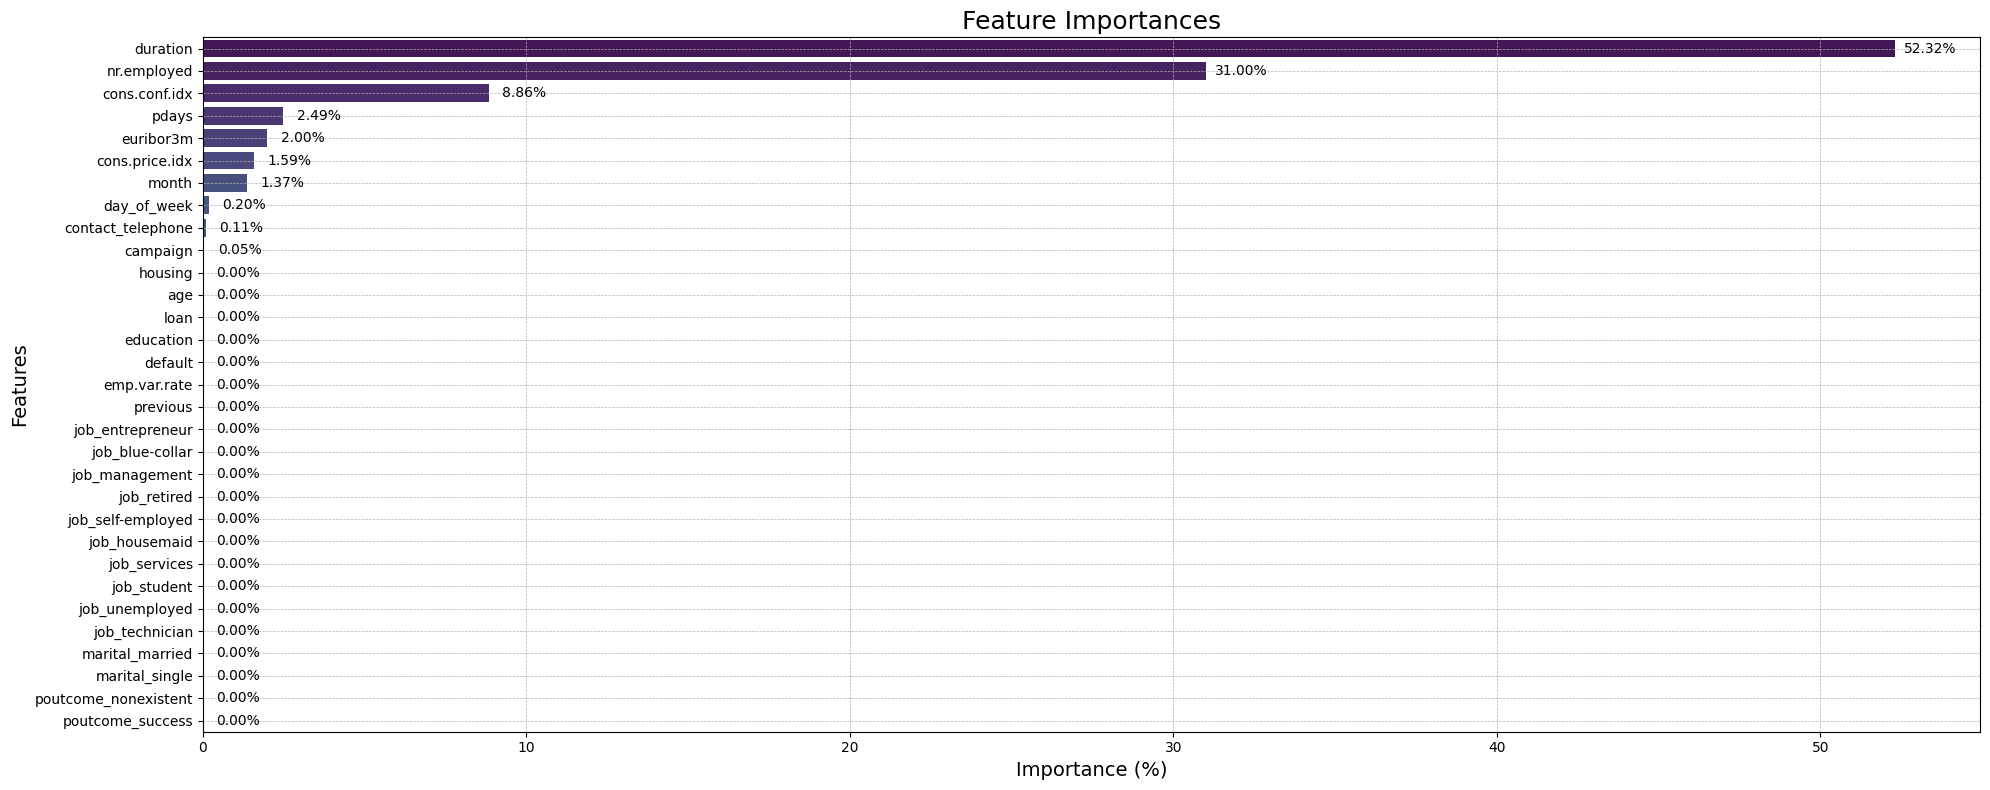

In [54]:
# Plot feature importances
plt.figure(figsize=(20, 8))
# Sorting the features dataframe by 'Importance (%)' in descending order before plotting
features_sorted = features.sort_values(by='Importance (%)', ascending=False)
barplot = sns.barplot(x='Importance (%)', y='Features', data=features_sorted, palette="viridis")
plt.title('Feature Importances', fontsize=18)
plt.xlabel('Importance (%)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(f"{format(p.get_width(), '.2f')}%", (p.get_width() + 0.70, p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(9, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

##### Questions